In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('/Users/arijitchandra/Downloads/Mobility_analytics/train.csv', parse_dates=True)
test = pd.read_csv('/Users/arijitchandra/Downloads/Mobility_analytics/test.csv', parse_dates=True)
sub = pd.read_csv('/Users/arijitchandra/Downloads/Mobility_analytics/sub.csv')

In [2]:
print(train.shape)
print(test.shape)
print(sub.shape)

(131662, 14)
(87395, 13)
(87395, 2)


In [3]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [4]:
test.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
count,87395.000000,83429.000000,74068.000000,87395.000000,87395.000000,40606.000000,87395.000000,87395.000000
mean,44.095174,5.990051,2.803392,2.847389,0.783031,63.936610,51.162160,75.015699
std,25.483993,3.626861,0.227113,0.981744,1.034266,21.636247,4.956831,11.582761
min,1.550000,0.000000,1.317850,0.001250,0.000000,30.000000,41.000000,52.000000
25%,24.540000,3.000000,2.654518,2.152500,0.000000,45.000000,48.000000,67.000000
50%,38.060000,6.000000,2.798630,2.895000,0.000000,61.000000,50.000000,73.000000
75%,60.690000,10.000000,2.949053,3.580000,1.000000,79.000000,54.000000,82.000000
max,109.230000,10.000000,4.871920,5.000000,8.000000,178.000000,116.000000,169.000000


In [5]:
train.Surge_Pricing_Type=train.Surge_Pricing_Type.astype('category')

In [6]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 5
Total Features with NaN Values in test = 5


In [7]:
len(train)-train.count()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [8]:
### Percentage of Null value in train dataset
train.isna().mean().round(4) * 100

Trip_ID                         0.00
Trip_Distance                   0.00
Type_of_Cab                    15.35
Customer_Since_Months           4.50
Life_Style_Index               15.34
Confidence_Life_Style_Index    15.34
Destination_Type                0.00
Customer_Rating                 0.00
Cancellation_Last_1Month        0.00
Var1                           53.95
Var2                            0.00
Var3                            0.00
Gender                          0.00
Surge_Pricing_Type              0.00
dtype: float64

In [9]:
### Percentage of Null value in test dataset
test.isna().mean().round(4) * 100

Trip_ID                         0.00
Trip_Distance                   0.00
Type_of_Cab                    15.06
Customer_Since_Months           4.54
Life_Style_Index               15.25
Confidence_Life_Style_Index    15.25
Destination_Type                0.00
Customer_Rating                 0.00
Cancellation_Last_1Month        0.00
Var1                           53.54
Var2                            0.00
Var3                            0.00
Gender                          0.00
dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

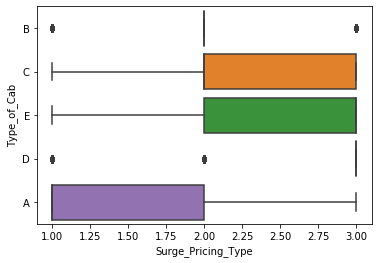

In [11]:
sns.boxplot(train.Surge_Pricing_Type,train.Type_of_Cab)
plt.show()

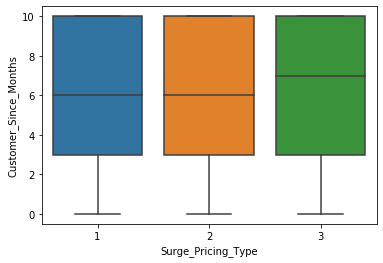

In [12]:
sns.boxplot(train.Surge_Pricing_Type,train.Customer_Since_Months)
plt.show()

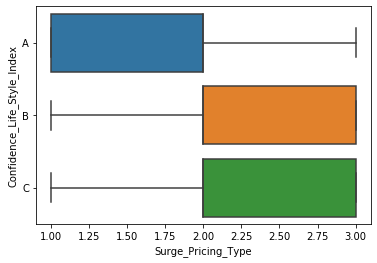

In [13]:
sns.boxplot(train.Surge_Pricing_Type,train.Confidence_Life_Style_Index)
plt.show()

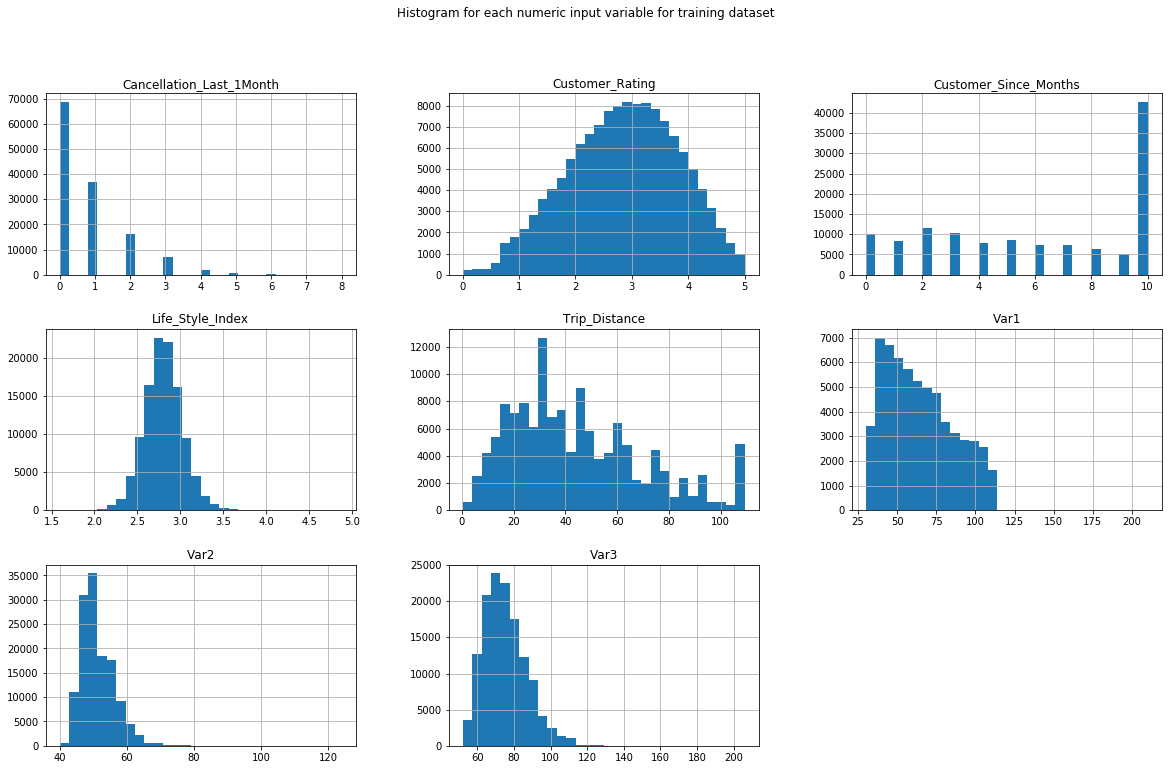

In [14]:
train.hist(bins=30, figsize=(20,12),layout=(3,3)) 
pl.suptitle("Histogram for each numeric input variable for training dataset") 
plt.show()

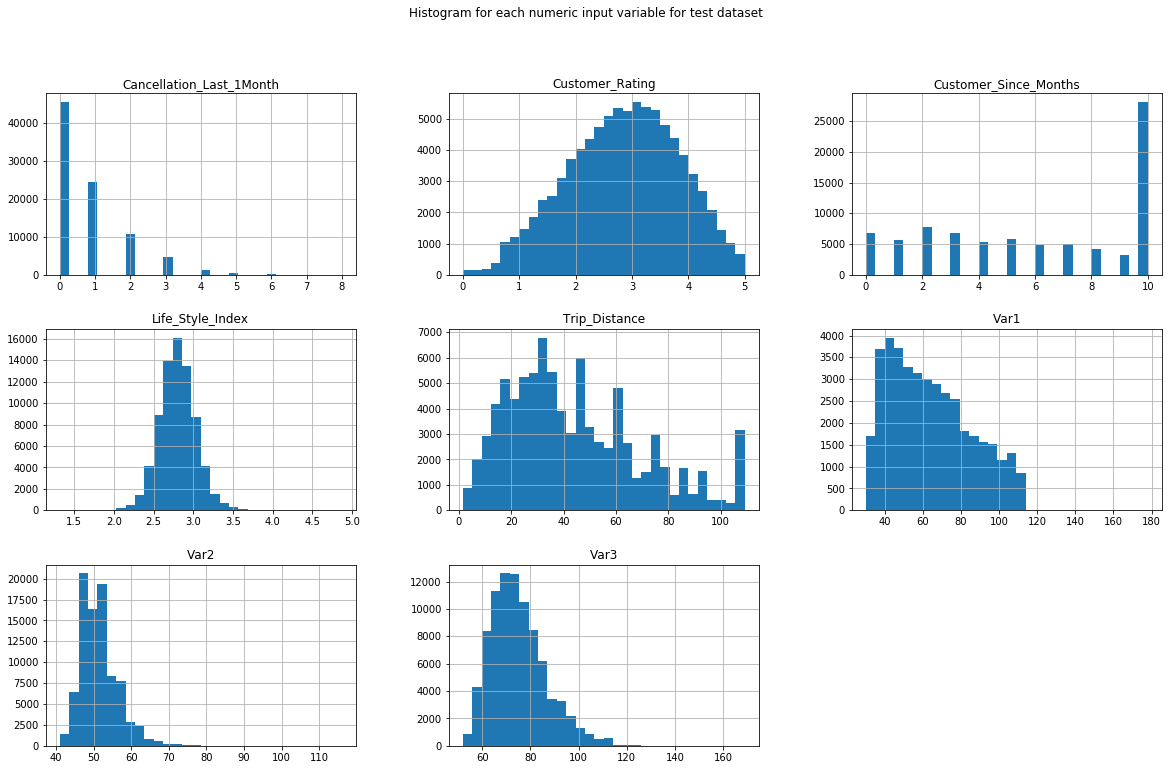

In [15]:
test.hist(bins=30, figsize=(20,12),layout=(3,3)) 
pl.suptitle("Histogram for each numeric input variable for test dataset") 
plt.show()

In [16]:
train.dtypes

Trip_ID                          object
Trip_Distance                   float64
Type_of_Cab                      object
Customer_Since_Months           float64
Life_Style_Index                float64
Confidence_Life_Style_Index      object
Destination_Type                 object
Customer_Rating                 float64
Cancellation_Last_1Month          int64
Var1                            float64
Var2                              int64
Var3                              int64
Gender                           object
Surge_Pricing_Type             category
dtype: object

In [17]:
train.Type_of_Cab.fillna('M', inplace=True)
train.Confidence_Life_Style_Index.fillna('M', inplace=True)

test.Type_of_Cab.fillna('M', inplace=True)
test.Confidence_Life_Style_Index.fillna('M', inplace=True)

In [18]:
train.Customer_Since_Months.fillna(train.Customer_Since_Months.median(), inplace=True)
train.Life_Style_Index.fillna(train.Life_Style_Index.mean(), inplace=True)

test.Customer_Since_Months.fillna(test.Customer_Since_Months.median(), inplace=True)
test.Life_Style_Index.fillna(test.Life_Style_Index.mean(), inplace=True)

cols_to_drop=['Trip_ID','Var1']
train.drop(cols_to_drop,axis=1, inplace=True)
test.drop(cols_to_drop,axis=1, inplace=True)

In [19]:
train.shape, test.shape

((131662, 12), (87395, 11))

In [20]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size)) 
print("Total Features with NaN Values in test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0
Total Features with NaN Values in test = 0


In [21]:
y_trn=train.Surge_Pricing_Type
train.drop('Surge_Pricing_Type', axis=1, inplace=True)
y_trn.shape

(131662,)

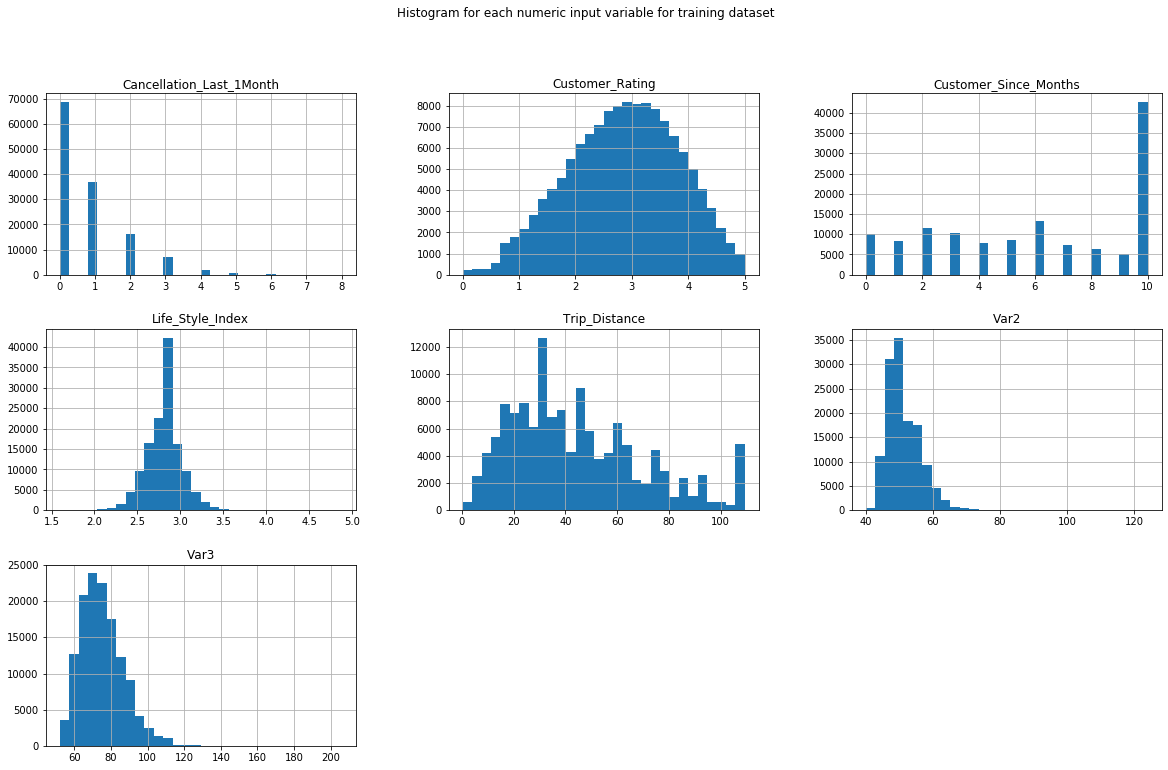

In [22]:
train.hist(bins=30, figsize=(20,12),layout=(3,3)) 
pl.suptitle("Histogram for each numeric input variable for training dataset") 
plt.show()

In [23]:
train.Trip_Distance=train.Trip_Distance.apply(np.sqrt).apply(np.log10)
test.Trip_Distance=test.Trip_Distance.apply(np.sqrt).apply(np.log10)

In [24]:
train.Trip_Distance=train.Trip_Distance.apply(np.exp2)
test.Trip_Distance=test.Trip_Distance.apply(np.exp2)

In [ ]:
#from sklearn.preprocessing import LabelEncoder 
#  
#le = LabelEncoder()
#
#train.Type_of_Cab=le.fit_transform(train.Type_of_Cab)
#train.Confidence_Life_Style_Index=le.fit_transform(train.Confidence_Life_Style_Index)
#train.Destination_Type=le.fit_transform(train.Destination_Type)
#train.Gender=le.fit_transform(train.Gender)
#
#test.Type_of_Cab=le.fit_transform(test.Type_of_Cab)
#test.Confidence_Life_Style_Index=le.fit_transform(test.Confidence_Life_Style_Index)
#test.Destination_Type=le.fit_transform(test.Destination_Type)
#test.Gender=le.fit_transform(test.Gender)


In [ ]:
#from sklearn.preprocessing import OneHotEncoder 
# 
#onehotencoder = OneHotEncoder()
#train=pd.DataFrame(onehotencoder.fit_transform(train).toarray())

In [25]:
encoded_train=pd.get_dummies(train)
encoded_test=pd.get_dummies(test)
final_train, final_test = encoded_train.align(encoded_test, join='left', axis=1)
final_train.shape, final_test.shape

((131662, 33), (87395, 33))

In [26]:
from sklearn.model_selection import train_test_split
X_tst = final_test
X_train, X_valid, y_train, y_valid = train_test_split(final_train, y_trn,stratify=y_trn,
                                                      test_size=0.3,random_state=41)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((92163, 33), (92163,), (39499, 33), (39499,), (87395, 33))

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=8,min_samples_leaf=10, min_samples_split=3, 
                             max_features='sqrt').fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_valid, y_valid)))


Accuracy of Decision Tree classifier on training set: 0.72
Accuracy of Decision Tree classifier on test set: 0.66


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=125,random_state=8,max_features = "sqrt",max_depth=None,bootstrap=False,
                            min_samples_leaf=10,min_samples_split=3, n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_valid, y_valid)))

Accuracy of Random Forest classifier on training set: 0.76
Accuracy of Random Forest classifier on test set: 0.70


In [39]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

16


,importance
Type_of_Cab_A,2.113965e-01
Type_of_Cab_B,1.657351e-01
Type_of_Cab_D,1.403787e-01
Type_of_Cab_C,6.447472e-02
Trip_Distance,6.257735e-02
Type_of_Cab_E,5.742039e-02
Customer_Rating,4.912969e-02
Life_Style_Index,4.057012e-02
Cancellation_Last_1Month,3.571237e-02
Var3,3.189693e-02


In [40]:
from sklearn.ensemble import RandomForestClassifier
rfi = RandomForestClassifier(n_estimators=87,random_state=8,max_features = "sqrt",max_depth=30,bootstrap=True,
                            min_samples_leaf=8,min_samples_split=5, oob_score = True,n_jobs = -1)
rfi.fit(X_train[imp_feature], y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfi.score(X_train[imp_feature], y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfi.score(X_valid[imp_feature], y_valid)))

Accuracy of Random Forest classifier on training set: 0.77
Accuracy of Random Forest classifier on test set: 0.69


In [41]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(leaf_size=30,n_jobs=-1,n_neighbors=5,weights='distance',
#                           algorithm='auto',metric='minkowski',p=2)
knn = KNeighborsClassifier(leaf_size=30,n_jobs=-1,n_neighbors=13,weights='uniform',algorithm='auto',
                           metric='minkowski',p=1)
knn.fit(X_train[imp_feature], y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train[imp_feature], y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_valid[imp_feature], y_valid)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.66


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train[imp_feature], y_train)

In [ ]:
rf_random.best_params_

In [42]:
print('Checking high correlation between all feature in train dataset:')
feature_names=[i for i in final_train.columns if final_train[i].dtypes != 'object']
X = final_train[feature_names]
corr_matrix = X.corr().abs()
high_corr_var=np.where(corr_matrix>0.5)
corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print('Variable with high correlation are :',corr_var)

Checking high correlation between all feature in train dataset:
Variable with high correlation are : [('Var2', 'Var3'), ('Destination_Type_A', 'Destination_Type_B'), ('Gender_Female', 'Gender_Male')]


In [43]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBClassifier

In [44]:
XGBModel = XGBClassifier(booster='gbtree', n_estimators=200,max_depth=10,min_child_weight=2,subsample=0.8,
                         colsample_bytree=0.8,
                        gamma=0, eval_metric='auc', eta=0.01, seed=123, objective= 'reg:logistic')
XGBModel.fit(X_train[imp_feature], y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_valid[imp_feature])

In [45]:
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(XGBModel.score(X_train[imp_feature], y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(XGBModel.score(X_valid[imp_feature], y_valid)))

Accuracy of XGB classifier on training set: 0.82
Accuracy of XGB classifier on test set: 0.70


In [46]:
pred=XGBModel.predict(X_tst[imp_feature])
sub['Surge_Pricing_Type'] = pred
sub.to_csv('submission.csv', index=False)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_tst_scaled=StandardScaler().fit_transform(final_test)
X_tst_scaled=pd.DataFrame(X_tst_scaled,columns=[final_test.columns])
X_trn_scaled=StandardScaler().fit_transform(final_train)
X_trn_scaled=pd.DataFrame(X_trn_scaled,columns=[final_train.columns])
X_train_scaled, X_valid_scaled, y_train_scaled, y_valid_scaled = train_test_split(X_trn_scaled, 
                                                                                  y_trn,stratify=y_trn,test_size=0.3,
                                                                                  random_state=41)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]
#max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
#min_child_weight=[int(x) for x in np.linspace(0, 10, num = 11)]
#subsample=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
#colsample_bytree=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
#gamma = [x.round(3) for x in np.linspace(.01, .3, num = 10)]
#eta=[x.round(3) for x in np.linspace(.01, .2, num = 10)]
#eval_metric='auc'
#seed=[8,41,123]
#objective= 'reg:logistic'
#booster='gbtree'
## Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_depth': max_depth,
#               'min_child_weight':min_child_weight,
#               'subsample': subsample,
#               'colsample_bytree': colsample_bytree,
#               'gamma': gamma,
#               'eta': eta,
#               'seed':seed}
#print(random_grid)

In [ ]:
#xgb = XGBClassifier(eval_metric='auc',booster='gbtree',objective='reg:logistic')
## Random search of parameters, using 3 fold cross validation, 
#xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 3, random_state=42, n_jobs = -1)
## Fit the random search model
#xgb_random.fit(X_train[imp_feature], y_train)

In [ ]:
#xgb_random.best_params_

In [59]:
XGBModel1 = XGBClassifier(booster='gbtree', n_estimators=150,max_depth=9,min_child_weight=2,subsample=0.5,
                         colsample_bytree=0.5,
                        gamma=0, eval_metric='merror', eta=0.01, seed=41, objective= 'reg:logistic')

XGBModel1.fit(X_train_scaled, y_train , verbose=False)
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(XGBModel1.score(X_train_scaled, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(XGBModel1.score(X_valid_scaled, y_valid)))

Accuracy of XGB classifier on training set: 0.76
Accuracy of XGB classifier on test set: 0.70


In [53]:
#from sklearn.neighbors import KNeighborsClassifier
##knn = KNeighborsClassifier(leaf_size=30,n_jobs=-1,n_neighbors=5,weights='distance',
##                           algorithm='auto',metric='minkowski',p=2)
#knns = KNeighborsClassifier(leaf_size=8,n_jobs=-1,n_neighbors=13,weights='uniform',algorithm='auto',
#                           metric='minkowski',p=2)
#knns.fit(X_train_scaled, y_train)
#print('Accuracy of K-NN classifier on training set: {:.2f}'
#     .format(knns.score(X_train_scaled, y_train)))
#print('Accuracy of K-NN classifier on test set: {:.2f}'
#     .format(knns.score(X_valid_scaled, y_valid)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.68


In [60]:
pred=XGBModel1.predict(X_tst_scaled)
sub['Surge_Pricing_Type'] = pred
sub.to_csv('submission.csv', index=False)